# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Loading the Data and Selecting the Features

### Import Data

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0)

### Explore Data

In [3]:
loan_data_inputs_train.head()

,Unnamed: 0.1,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,...,NumberRealEstateLoansOrLines_factor,NumberRealEstateLoansOrLines:0,NumberRealEstateLoansOrLines:1,NumberRealEstateLoansOrLines:2,NumberRealEstateLoansOrLines:>=3,NumberOfDependents_factor,NumberOfDependents:0,NumberOfDependents:1,NumberOfDependents:2,NumberOfDependents:>=3
99139,99140,0.560433,48,0,0.422554,6100.0,12,0,1,0,...,"(0.667, 1.333]",0,1,0,0,"(2.25, 3.0]",0,0,0,1
127712,127713,0.260795,46,0,0.378894,12100.0,20,0,1,0,...,"(0.667, 1.333]",0,1,0,0,"(1.5, 2.25]",0,0,1,0
16539,16540,1.036050,27,1,0.107178,3050.0,3,0,0,0,...,"(-0.002, 0.667]",1,0,0,0,"(-0.003, 0.75]",1,0,0,0
47657,47658,0.233306,52,1,0.334374,15700.0,11,0,1,0,...,"(0.667, 1.333]",0,1,0,0,"(0.75, 1.5]",0,1,0,0
147176,147177,0.022434,60,0,0.305190,4334.0,5,0,1,0,...,"(0.667, 1.333]",0,1,0,0,"(-0.003, 0.75]",1,0,0,0


In [4]:
loan_data_targets_train.head()

,SeriousDlqin2yrs
99139,0
127712,0
16539,0
47657,0
147176,0


In [5]:
loan_data_inputs_train.shape

(120000, 62)

In [6]:
loan_data_targets_train.shape

(120000, 1)

In [7]:
loan_data_inputs_test.shape

(30000, 62)

In [8]:
loan_data_targets_test.shape

(30000, 1)

### Selecting the Features

In [9]:
list(loan_data_inputs_test)

['Unnamed: 0.1',
 'RevolvingUtilizationOfUnsecuredLines',
 'age',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents',
 'age_factor',
 'age:<=21',
 'age:22-43',
 'age:44-65',
 'age:66>=',
 'RevolvingUtilizationOfUnsecuredLines_factor',
 'RevolvingUtilizationOfUnsecuredLines:<0.15',
 'RevolvingUtilizationOfUnsecuredLines:0.15-0.3',
 'RevolvingUtilizationOfUnsecuredLines:0.3-0.45',
 'RevolvingUtilizationOfUnsecuredLines:0.45-0.6',
 'RevolvingUtilizationOfUnsecuredLines:0.6-0.75',
 'RevolvingUtilizationOfUnsecuredLines:0.75-0.9',
 'RevolvingUtilizationOfUnsecuredLines:0.9-1.05',
 'RevolvingUtilizationOfUnsecuredLines:1.05-1.20',
 'NumberOfTime30-59DaysPastDueNotWorse_factor',
 'NumberOfTime30-59DaysPastDueNotWorse:0',
 'NumberOfTime30-59DaysPastDueNotWorse:=1',
 'NumberOfTime30-59DaysPastDueNotWorse:>1',
 'Numb

In [10]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , [
 'age:22-43',
 'age:44-65',
 'age:66>=',
 'RevolvingUtilizationOfUnsecuredLines:0.15-0.3',
 'RevolvingUtilizationOfUnsecuredLines:0.3-0.45',
 'RevolvingUtilizationOfUnsecuredLines:0.45-0.6',
 'RevolvingUtilizationOfUnsecuredLines:0.6-0.75',
 'RevolvingUtilizationOfUnsecuredLines:0.75-0.9',
 'RevolvingUtilizationOfUnsecuredLines:0.9-1.05',
 'RevolvingUtilizationOfUnsecuredLines:1.05-1.20',
 'NumberOfTime30-59DaysPastDueNotWorse:=1',
 'NumberOfTime30-59DaysPastDueNotWorse:>1',
 'NumberOfTimes90DaysLate:>=1',
 'NumberOfTime60-89DaysPastDueNotWorse:>=1',
 'DebtRatio:0.1-0.2',
 'DebtRatio:0.2-0.4',
 'DebtRatio:0.4-0.6',
 'DebtRatio:0.6-0.8',
 'DebtRatio:0.8-1',
 'DebtRatio:>1',
 'MonthlyIncome:5k-10k',
 'MonthlyIncome:10k-15k',
 'MonthlyIncome:>15k',
 'NumberOfOpenCreditLinesAndLoans:5-9',
 'NumberOfOpenCreditLinesAndLoans:9-14',
 'NumberOfOpenCreditLinesAndLoans:14-19',
 'NumberOfOpenCreditLinesAndLoans:>19',
 'NumberRealEstateLoansOrLines:1',
 'NumberRealEstateLoansOrLines:2',
 'NumberRealEstateLoansOrLines:>=3',
 'NumberOfDependents:1',
 'NumberOfDependents:2',
 'NumberOfDependents:>=3',
]]

In [11]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['age:<=21',
 'RevolvingUtilizationOfUnsecuredLines:<0.15',
 'NumberOfTime30-59DaysPastDueNotWorse:0',
                   'NumberOfTimes90DaysLate:0',
                   'NumberOfTime60-89DaysPastDueNotWorse:0',
                   'DebtRatio:0',
                  'MonthlyIncome:0-5k',
 'NumberOfOpenCreditLinesAndLoans:0-4',
 'NumberRealEstateLoansOrLines:0',
 'NumberOfDependents:0',
                  
]

In [12]:
inputs_train_with_ref_cat.head(1)

,age:22-43,age:44-65,age:66>=,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,RevolvingUtilizationOfUnsecuredLines:1.05-1.20,...,NumberOfOpenCreditLinesAndLoans:5-9,NumberOfOpenCreditLinesAndLoans:9-14,NumberOfOpenCreditLinesAndLoans:14-19,NumberOfOpenCreditLinesAndLoans:>19,NumberRealEstateLoansOrLines:1,NumberRealEstateLoansOrLines:2,NumberRealEstateLoansOrLines:>=3,NumberOfDependents:1,NumberOfDependents:2,NumberOfDependents:>=3
99139,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1


In [13]:
inputs_train = inputs_train_with_ref_cat
inputs_train.head()

,age:22-43,age:44-65,age:66>=,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,RevolvingUtilizationOfUnsecuredLines:1.05-1.20,...,NumberOfOpenCreditLinesAndLoans:5-9,NumberOfOpenCreditLinesAndLoans:9-14,NumberOfOpenCreditLinesAndLoans:14-19,NumberOfOpenCreditLinesAndLoans:>19,NumberRealEstateLoansOrLines:1,NumberRealEstateLoansOrLines:2,NumberRealEstateLoansOrLines:>=3,NumberOfDependents:1,NumberOfDependents:2,NumberOfDependents:>=3
99139,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
127712,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
16539,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
47657,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
147176,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


# PD Model Estimation

## Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [15]:
reg = LogisticRegression()
# We create an instance of an object from the 'LogisticRegression' class.

In [16]:
pd.options.display.max_rows = None
# Sets the pandas dataframe options to display all columns/ rows.

In [17]:
inputs_train.head(1), inputs_train.tail(1)

(       age:22-43  age:44-65  age:66>=  \
 99139          0          1         0   
 
        RevolvingUtilizationOfUnsecuredLines:0.15-0.3  \
 99139                                              0   
 
        RevolvingUtilizationOfUnsecuredLines:0.3-0.45  \
 99139                                              0   
 
        RevolvingUtilizationOfUnsecuredLines:0.45-0.6  \
 99139                                              1   
 
        RevolvingUtilizationOfUnsecuredLines:0.6-0.75  \
 99139                                              0   
 
        RevolvingUtilizationOfUnsecuredLines:0.75-0.9  \
 99139                                              0   
 
        RevolvingUtilizationOfUnsecuredLines:0.9-1.05  \
 99139                                              0   
 
        RevolvingUtilizationOfUnsecuredLines:1.05-1.20  ...  \
 99139                                               0  ...   
 
        NumberOfOpenCreditLinesAndLoans:5-9  \
 99139                                    0

In [18]:
loan_data_targets_train.head(1), loan_data_targets_train.tail(1)

(       SeriousDlqin2yrs
 99139                 0,
        SeriousDlqin2yrs
 86364                 0)

In [19]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

C:\Users\nmtii\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [20]:
reg.intercept_
# Displays the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class.

array([-5.35422295])

In [21]:
reg.coef_
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.

array([[ 1.15021616,  0.89262163,  0.48637789,  0.32912559,  0.72842219,
         1.01185238,  1.2752884 ,  1.4679443 ,  1.72506443,  2.16245304,
         0.78475891,  1.18869014,  1.49832886,  0.94363016,  0.25929408,
         0.26375977,  0.44183398,  0.56963542,  0.68736548,  0.52072377,
        -0.20894882, -0.37860563, -0.34145402,  0.04562734,  0.29545298,
         0.54119088,  0.63137112, -0.26963061, -0.20434446,  0.2593592 ,
         0.09766791,  0.09482567,  0.22160427]])

In [22]:
feature_name = inputs_train.columns.values

In [23]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)

In [24]:
summary_table['Coefficients'] = np.transpose(reg.coef_)

In [25]:
summary_table

,Feature name,Coefficients
0,age:22-43,1.150216
1,age:44-65,0.892622
2,age:66>=,0.486378
3,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,0.329126
4,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,0.728422
5,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,1.011852
6,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,1.275288
7,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,1.467944
8,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,1.725064
9,RevolvingUtilizationOfUnsecuredLines:1.05-1.20,2.162453


In [26]:
summary_table.index = summary_table.index + 1

In [27]:
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]

In [28]:
summary_table = summary_table.sort_index()

In [29]:
summary_table

,Feature name,Coefficients
0,Intercept,-5.354223
1,age:22-43,1.150216
2,age:44-65,0.892622
3,age:66>=,0.486378
4,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,0.329126
5,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,0.728422
6,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,1.011852
7,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,1.275288
8,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,1.467944
9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,1.725064


## Build a Logistic Regression Model with P-Values

In [30]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [31]:
reg = LogisticRegression_with_p_values()

In [32]:
reg.fit(inputs_train, loan_data_targets_train)

C:\Users\nmtii\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [33]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-5.354223
1,age:22-43,1.150216
2,age:44-65,0.892622
3,age:66>=,0.486378
4,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,0.329126
5,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,0.728422
6,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,1.011852
7,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,1.275288
8,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,1.467944
9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,1.725064


In [34]:
p_values = reg.p_values

In [35]:
p_values

[3.5263514082689005e-38,
 4.8873449021145777e-23,
 3.7571012608427046e-07,
 3.1746047563791396e-09,
 2.325003139139062e-40,
 1.9767121957235304e-76,
 5.720019091231115e-125,
 5.685189219236594e-180,
 0.0,
 6.696134154354357e-201,
 3.7971335004023194e-124,
 3.756682808868203e-210,
 0.0,
 2.258313331172943e-141,
 0.002442934663881577,
 0.0030208930128093744,
 1.861560417348773e-06,
 8.588054851593385e-09,
 2.3782822222901924e-10,
 3.418491198610133e-09,
 2.2412800550931146e-12,
 1.707464450707029e-10,
 5.2332980698558094e-05,
 0.2274123519466057,
 9.783895845072424e-11,
 2.5001956776124348e-20,
 5.966395878658925e-16,
 8.705219193222475e-13,
 5.479814067319551e-06,
 1.5148533630474423e-05,
 0.0061603130926935305,
 0.015047759926205556,
 2.8729451908810774e-07]

In [36]:
p_values = np.append(0, np.array(p_values))

In [37]:
p_values

array([0.00000000e+000, 3.52635141e-038, 4.88734490e-023, 3.75710126e-007,
       3.17460476e-009, 2.32500314e-040, 1.97671220e-076, 5.72001909e-125,
       5.68518922e-180, 0.00000000e+000, 6.69613415e-201, 3.79713350e-124,
       3.75668281e-210, 0.00000000e+000, 2.25831333e-141, 2.44293466e-003,
       3.02089301e-003, 1.86156042e-006, 8.58805485e-009, 2.37828222e-010,
       3.41849120e-009, 2.24128006e-012, 1.70746445e-010, 5.23329807e-005,
       2.27412352e-001, 9.78389585e-011, 2.50019568e-020, 5.96639588e-016,
       8.70521919e-013, 5.47981407e-006, 1.51485336e-005, 6.16031309e-003,
       1.50477599e-002, 2.87294519e-007])

In [38]:
summary_table['p_values'] = p_values

In [39]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-5.354223,0.000000e+00
1,age:22-43,1.150216,3.526351e-38
2,age:44-65,0.892622,4.887345e-23
3,age:66>=,0.486378,3.757101e-07
4,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,0.329126,3.174605e-09
5,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,0.728422,2.325003e-40
6,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,1.011852,1.976712e-76
7,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,1.275288,5.720019e-125
8,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,1.467944,5.685189e-180
9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,1.725064,0.000000e+00


In [40]:
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , [ 'age:22-43',
 'age:44-65',
 'age:66>=',
 'RevolvingUtilizationOfUnsecuredLines:0.15-0.3',
 'RevolvingUtilizationOfUnsecuredLines:0.3-0.45',
 'RevolvingUtilizationOfUnsecuredLines:0.45-0.6',
 'RevolvingUtilizationOfUnsecuredLines:0.6-0.75',
 'RevolvingUtilizationOfUnsecuredLines:0.75-0.9',
 'RevolvingUtilizationOfUnsecuredLines:0.9-1.05',
 'RevolvingUtilizationOfUnsecuredLines:1.05-1.20',
 'NumberOfTime30-59DaysPastDueNotWorse:=1',
 'NumberOfTime30-59DaysPastDueNotWorse:>1',
 'NumberOfTimes90DaysLate:>=1',
 'NumberOfTime60-89DaysPastDueNotWorse:>=1',
 'DebtRatio:0.1-0.2',
 'DebtRatio:0.2-0.4',
 'DebtRatio:0.4-0.6',
 'DebtRatio:0.6-0.8',
 'DebtRatio:0.8-1',
 'DebtRatio:>1',
 'MonthlyIncome:5k-10k',
 'MonthlyIncome:10k-15k',
 'MonthlyIncome:>15k',
 'NumberOfOpenCreditLinesAndLoans:5-9',
 'NumberOfOpenCreditLinesAndLoans:9-14',
 'NumberOfOpenCreditLinesAndLoans:14-19',
 'NumberOfOpenCreditLinesAndLoans:>19',
 'NumberRealEstateLoansOrLines:1',
 'NumberRealEstateLoansOrLines:2',
 'NumberRealEstateLoansOrLines:>=3',
 'NumberOfDependents:1',
 'NumberOfDependents:2',
 'NumberOfDependents:>=3',
]]

In [41]:
inputs_train = inputs_train_with_ref_cat
inputs_train.head()

,age:22-43,age:44-65,age:66>=,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,RevolvingUtilizationOfUnsecuredLines:1.05-1.20,...,NumberOfOpenCreditLinesAndLoans:5-9,NumberOfOpenCreditLinesAndLoans:9-14,NumberOfOpenCreditLinesAndLoans:14-19,NumberOfOpenCreditLinesAndLoans:>19,NumberRealEstateLoansOrLines:1,NumberRealEstateLoansOrLines:2,NumberRealEstateLoansOrLines:>=3,NumberOfDependents:1,NumberOfDependents:2,NumberOfDependents:>=3
99139,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
127712,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
16539,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
47657,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
147176,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [42]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

C:\Users\nmtii\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [43]:
feature_name = inputs_train.columns.values

In [44]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,-5.354223
1,age:22-43,1.150216
2,age:44-65,0.892622
3,age:66>=,0.486378
4,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,0.329126
5,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,0.728422
6,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,1.011852
7,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,1.275288
8,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,1.467944
9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,1.725064


In [45]:
p_values = reg2.p_values
p_values = np.append(0,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-5.354223,0.000000e+00
1,age:22-43,1.150216,3.526351e-38
2,age:44-65,0.892622,4.887345e-23
3,age:66>=,0.486378,3.757101e-07
4,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,0.329126,3.174605e-09
5,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,0.728422,2.325003e-40
6,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,1.011852,1.976712e-76
7,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,1.275288,5.720019e-125
8,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,1.467944,5.685189e-180
9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,1.725064,0.000000e+00


In [46]:
import pickle

In [47]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))

PD Model Validation (Test)

In [48]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , [ 'age:22-43',
 'age:44-65',
 'age:66>=',
 'RevolvingUtilizationOfUnsecuredLines:0.15-0.3',
 'RevolvingUtilizationOfUnsecuredLines:0.3-0.45',
 'RevolvingUtilizationOfUnsecuredLines:0.45-0.6',
 'RevolvingUtilizationOfUnsecuredLines:0.6-0.75',
 'RevolvingUtilizationOfUnsecuredLines:0.75-0.9',
 'RevolvingUtilizationOfUnsecuredLines:0.9-1.05',
 'RevolvingUtilizationOfUnsecuredLines:1.05-1.20',
 'NumberOfTime30-59DaysPastDueNotWorse:=1',
 'NumberOfTime30-59DaysPastDueNotWorse:>1',
 'NumberOfTimes90DaysLate:>=1',
 'NumberOfTime60-89DaysPastDueNotWorse:>=1',
 'DebtRatio:0.1-0.2',
 'DebtRatio:0.2-0.4',
 'DebtRatio:0.4-0.6',
 'DebtRatio:0.6-0.8',
 'DebtRatio:0.8-1',
 'DebtRatio:>1',
 'MonthlyIncome:5k-10k',
 'MonthlyIncome:10k-15k',
 'MonthlyIncome:>15k',
 'NumberOfOpenCreditLinesAndLoans:5-9',
 'NumberOfOpenCreditLinesAndLoans:9-14',
 'NumberOfOpenCreditLinesAndLoans:14-19',
 'NumberOfOpenCreditLinesAndLoans:>19',
 'NumberRealEstateLoansOrLines:1',
 'NumberRealEstateLoansOrLines:2',
 'NumberRealEstateLoansOrLines:>=3',
 'NumberOfDependents:1',
 'NumberOfDependents:2',
 'NumberOfDependents:>=3',
]]

In [49]:
inputs_test = inputs_test_with_ref_cat
inputs_test.head()

,age:22-43,age:44-65,age:66>=,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,RevolvingUtilizationOfUnsecuredLines:1.05-1.20,...,NumberOfOpenCreditLinesAndLoans:5-9,NumberOfOpenCreditLinesAndLoans:9-14,NumberOfOpenCreditLinesAndLoans:14-19,NumberOfOpenCreditLinesAndLoans:>19,NumberRealEstateLoansOrLines:1,NumberRealEstateLoansOrLines:2,NumberRealEstateLoansOrLines:>=3,NumberOfDependents:1,NumberOfDependents:2,NumberOfDependents:>=3
96727,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
26241,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2345,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
63665,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
106509,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [50]:
y_hat_test = reg2.model.predict(inputs_test)

In [51]:
y_hat_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [52]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)

In [53]:
y_hat_test_proba

array([[0.94469071, 0.05530929],
       [0.97870076, 0.02129924],
       [0.98466045, 0.01533955],
       ...,
       [0.9792527 , 0.0207473 ],
       [0.48746035, 0.51253965],
       [0.95924303, 0.04075697]])

In [54]:
y_hat_test_proba[:][:,1]

array([0.05530929, 0.02129924, 0.01533955, ..., 0.0207473 , 0.51253965,
       0.04075697])

In [55]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [56]:
y_hat_test_proba
# This variable contains an array of probabilities of being 1.

array([0.05530929, 0.02129924, 0.01533955, ..., 0.0207473 , 0.51253965,
       0.04075697])

In [57]:
loan_data_targets_test_temp = loan_data_targets_test

In [58]:
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.

In [59]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes.

In [60]:
df_actual_predicted_probs.shape

(30000, 2)

In [61]:
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']

In [62]:
df_actual_predicted_probs.index = loan_data_inputs_test.index
# Makes the index of one dataframe equal to the index of another dataframe.

In [63]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
96727,0,0.055309
26241,0,0.021299
2345,0,0.015340
63665,0,0.027569
106509,0,0.015392


In [64]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba
59658,0,0.032577
147756,0,0.008666
13173,0,0.020747
31837,1,0.512540
45740,0,0.040757


Accuracy and Area under the Curve¶

In [71]:
tr = 0.05
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [72]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,20378,7683
1,365,1574


In [73]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.679267,0.256100
1,0.012167,0.052467


In [74]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.7317333333333333

In [75]:
from sklearn.metrics import roc_curve, roc_auc_score

In [76]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.

(array([0.00000000e+00, 3.56366487e-05, 7.12732975e-05, ...,
        9.99750543e-01, 9.99857453e-01, 1.00000000e+00]),
 array([0., 0., 0., ..., 1., 1., 1.]),
 array([1.92146317, 0.92146317, 0.9173403 , ..., 0.005185  , 0.00470589,
        0.00382193]))

In [77]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

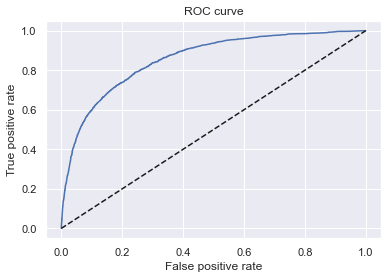

In [79]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [80]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.8560091191592678

Gini and Kolmogorov-Smirnov

In [81]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba', ascending= False)

In [82]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
145585,0,0.921463,1
54670,0,0.917340,1
111271,1,0.904637,1
130126,1,0.902174,1
27563,1,0.901463,1


In [83]:
df_actual_predicted_probs.tail()

,loan_data_targets_test,y_hat_test_proba,y_hat_test
15702,0,0.004706,0
127724,0,0.003822,0
104695,0,0.003822,0
91859,0,0.003822,0
60376,0,0.003822,0


In [84]:
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()

In [85]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,145585,0,0.921463,1
1,54670,0,0.917340,1
2,111271,1,0.904637,1
3,130126,1,0.902174,1
4,27563,1,0.901463,1


In [86]:
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [87]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Bad,Cumulative N Good
0,145585,0,0.921463,1,1,0,1
1,54670,0,0.917340,1,2,0,2
2,111271,1,0.904637,1,3,1,2
3,130126,1,0.902174,1,4,2,2
4,27563,1,0.901463,1,5,3,2


In [88]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

In [89]:
df_actual_predicted_probs.head()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
0,145585,0,0.921463,1,1,0,1,0.000033,0.000000,0.000036
1,54670,0,0.917340,1,2,0,2,0.000067,0.000000,0.000071
2,111271,1,0.904637,1,3,1,2,0.000100,0.000516,0.000071
3,130126,1,0.902174,1,4,2,2,0.000133,0.001031,0.000071
4,27563,1,0.901463,1,5,3,2,0.000167,0.001547,0.000071


In [90]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Bad,Cumulative N Good,Cumulative Perc Population,Cumulative Perc Bad,Cumulative Perc Good
29995,15702,0,0.004706,0,29996,1939,28057,0.999867,1.0,0.999857
29996,127724,0,0.003822,0,29997,1939,28058,0.999900,1.0,0.999893
29997,104695,0,0.003822,0,29998,1939,28059,0.999933,1.0,0.999929
29998,91859,0,0.003822,0,29999,1939,28060,0.999967,1.0,0.999964
29999,60376,0,0.003822,0,30000,1939,28061,1.000000,1.0,1.000000


Text(0.5, 1.0, 'Gini')

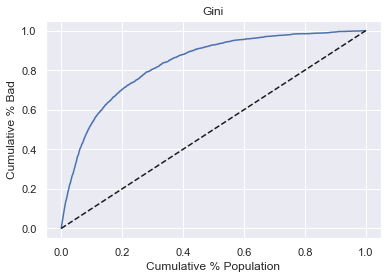

In [91]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [92]:
Gini = AUROC * 2 - 1
Gini

0.7120182383185356

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

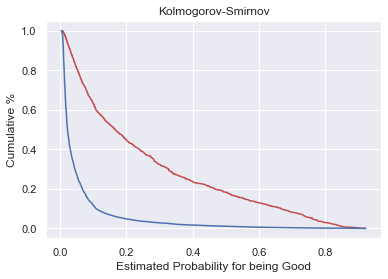

In [93]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [101]:
KS = max(df_actual_predicted_probs['Cumulative Perc Good'] - df_actual_predicted_probs['Cumulative Perc Bad'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.5470560443183906

Applying the PD Model

In [102]:
pd.options.display.max_columns = None
# Sets the pandas dataframe options to display all columns/ rows.

In [103]:
inputs_test_with_ref_cat.head()

,age:22-43,age:44-65,age:66>=,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,RevolvingUtilizationOfUnsecuredLines:1.05-1.20,NumberOfTime30-59DaysPastDueNotWorse:=1,NumberOfTime30-59DaysPastDueNotWorse:>1,NumberOfTimes90DaysLate:>=1,NumberOfTime60-89DaysPastDueNotWorse:>=1,DebtRatio:0.1-0.2,DebtRatio:0.2-0.4,DebtRatio:0.4-0.6,DebtRatio:0.6-0.8,DebtRatio:0.8-1,DebtRatio:>1,MonthlyIncome:5k-10k,MonthlyIncome:10k-15k,MonthlyIncome:>15k,NumberOfOpenCreditLinesAndLoans:5-9,NumberOfOpenCreditLinesAndLoans:9-14,NumberOfOpenCreditLinesAndLoans:14-19,NumberOfOpenCreditLinesAndLoans:>19,NumberRealEstateLoansOrLines:1,NumberRealEstateLoansOrLines:2,NumberRealEstateLoansOrLines:>=3,NumberOfDependents:1,NumberOfDependents:2,NumberOfDependents:>=3
96727,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
26241,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2345,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
63665,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
106509,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [104]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-5.354223,NaN
1,age:22-43,1.150216,3.526351e-38
2,age:44-65,0.892622,4.887345e-23
3,age:66>=,0.486378,3.757101e-07
4,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,0.329126,3.174605e-09
5,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,0.728422,2.325003e-40
6,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,1.011852,1.976712e-76
7,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,1.275288,5.720019e-125
8,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,1.467944,5.685189e-180
9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,1.725064,0.000000e+00


In [105]:
y_hat_test_proba

array([0.05530929, 0.02129924, 0.01533955, ..., 0.0207473 , 0.51253965,
       0.04075697])

Creating a Scorecard

In [106]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,-5.354223,NaN
1,age:22-43,1.150216,3.526351e-38
2,age:44-65,0.892622,4.887345e-23
3,age:66>=,0.486378,3.757101e-07
4,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,0.329126,3.174605e-09
5,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,0.728422,2.325003e-40
6,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,1.011852,1.976712e-76
7,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,1.275288,5.720019e-125
8,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,1.467944,5.685189e-180
9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,1.725064,0.000000e+00


In [107]:
ref_categories

['age:<=21',
 'RevolvingUtilizationOfUnsecuredLines:<0.15',
 'NumberOfTime30-59DaysPastDueNotWorse:0',
 'NumberOfTimes90DaysLate:0',
 'NumberOfTime60-89DaysPastDueNotWorse:0',
 'DebtRatio:0',
 'MonthlyIncome:0-5k',
 'NumberOfOpenCreditLinesAndLoans:0-4',
 'NumberRealEstateLoansOrLines:0',
 'NumberOfDependents:0']

In [108]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories['Coefficients'] = 0
# We create a second column, called 'Coefficients', which contains only 0 values.
df_ref_categories['p_values'] = np.nan
# We create a third column, called 'p_values', with contains only NaN values.
df_ref_categories

,Feature name,Coefficients,p_values
0,age:<=21,0,NaN
1,RevolvingUtilizationOfUnsecuredLines:<0.15,0,NaN
2,NumberOfTime30-59DaysPastDueNotWorse:0,0,NaN
3,NumberOfTimes90DaysLate:0,0,NaN
4,NumberOfTime60-89DaysPastDueNotWorse:0,0,NaN
5,DebtRatio:0,0,NaN
6,MonthlyIncome:0-5k,0,NaN
7,NumberOfOpenCreditLinesAndLoans:0-4,0,NaN
8,NumberRealEstateLoansOrLines:0,0,NaN
9,NumberOfDependents:0,0,NaN


In [109]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
# Concatenates two dataframes.
df_scorecard = df_scorecard.reset_index()
# We reset the index of a dataframe.
df_scorecard

,index,Feature name,Coefficients,p_values
0,0,Intercept,-5.354223,NaN
1,1,age:22-43,1.150216,3.526351e-38
2,2,age:44-65,0.892622,4.887345e-23
3,3,age:66>=,0.486378,3.757101e-07
4,4,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,0.329126,3.174605e-09
5,5,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,0.728422,2.325003e-40
6,6,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,1.011852,1.976712e-76
7,7,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,1.275288,5.720019e-125
8,8,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,1.467944,5.685189e-180
9,9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,1.725064,0.000000e+00


In [110]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,-5.354223,NaN,Intercept
1,1,age:22-43,1.150216,3.526351e-38,age
2,2,age:44-65,0.892622,4.887345e-23,age
3,3,age:66>=,0.486378,3.757101e-07,age
4,4,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,0.329126,3.174605e-09,RevolvingUtilizationOfUnsecuredLines
5,5,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,0.728422,2.325003e-40,RevolvingUtilizationOfUnsecuredLines
6,6,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,1.011852,1.976712e-76,RevolvingUtilizationOfUnsecuredLines
7,7,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,1.275288,5.720019e-125,RevolvingUtilizationOfUnsecuredLines
8,8,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,1.467944,5.685189e-180,RevolvingUtilizationOfUnsecuredLines
9,9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,1.725064,0.000000e+00,RevolvingUtilizationOfUnsecuredLines


In [111]:
min_score = 300
max_score = 850

In [112]:
df_scorecard.groupby('Original feature name')['Coefficients'].min()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.

Original feature name
DebtRatio                               0.000000
Intercept                              -5.354223
MonthlyIncome                          -0.378606
NumberOfDependents                      0.000000
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines           -0.269631
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
Name: Coefficients, dtype: float64

In [113]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the minimum values.
min_sum_coef

-6.002459180906947

In [114]:
df_scorecard.groupby('Original feature name')['Coefficients'].max()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.

Original feature name
DebtRatio                               0.687365
Intercept                              -5.354223
MonthlyIncome                           0.000000
NumberOfDependents                      0.221604
NumberOfOpenCreditLinesAndLoans         0.631371
NumberOfTime30-59DaysPastDueNotWorse    1.188690
NumberOfTime60-89DaysPastDueNotWorse    0.943630
NumberOfTimes90DaysLate                 1.498329
NumberRealEstateLoansOrLines            0.259359
RevolvingUtilizationOfUnsecuredLines    2.162453
age                                     1.150216
Name: Coefficients, dtype: float64

In [115]:
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# Up to the 'min()' method everything is the same as in te line above.
# Then, we aggregate further and sum all the maximum values.
max_sum_coef

3.388795471045961

In [116]:
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-5.354223,NaN,Intercept,-313.570735
1,1,age:22-43,1.150216,3.526351e-38,age,67.362553
2,2,age:44-65,0.892622,4.887345e-23,age,52.276497
3,3,age:66>=,0.486378,3.757101e-07,age,28.484782
4,4,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,0.329126,3.174605e-09,RevolvingUtilizationOfUnsecuredLines,19.275281
5,5,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,0.728422,2.325003e-40,RevolvingUtilizationOfUnsecuredLines,42.660136
6,6,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,1.011852,1.976712e-76,RevolvingUtilizationOfUnsecuredLines,59.259261
7,7,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,1.275288,5.720019e-125,RevolvingUtilizationOfUnsecuredLines,74.687424
8,8,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,1.467944,5.685189e-180,RevolvingUtilizationOfUnsecuredLines,85.970341
9,9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,1.725064,0.000000e+00,RevolvingUtilizationOfUnsecuredLines,101.028613


In [117]:
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score. 
df_scorecard

<ipython-input-117-6383eee17b30>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation
0,0,Intercept,-5.354223,NaN,Intercept,337.964036
1,1,age:22-43,1.150216,3.526351e-38,age,67.362553
2,2,age:44-65,0.892622,4.887345e-23,age,52.276497
3,3,age:66>=,0.486378,3.757101e-07,age,28.484782
4,4,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,0.329126,3.174605e-09,RevolvingUtilizationOfUnsecuredLines,19.275281
5,5,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,0.728422,2.325003e-40,RevolvingUtilizationOfUnsecuredLines,42.660136
6,6,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,1.011852,1.976712e-76,RevolvingUtilizationOfUnsecuredLines,59.259261
7,7,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,1.275288,5.720019e-125,RevolvingUtilizationOfUnsecuredLines,74.687424
8,8,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,1.467944,5.685189e-180,RevolvingUtilizationOfUnsecuredLines,85.970341
9,9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,1.725064,0.000000e+00,RevolvingUtilizationOfUnsecuredLines,101.028613


In [118]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,-5.354223,NaN,Intercept,337.964036,338.0
1,1,age:22-43,1.150216,3.526351e-38,age,67.362553,67.0
2,2,age:44-65,0.892622,4.887345e-23,age,52.276497,52.0
3,3,age:66>=,0.486378,3.757101e-07,age,28.484782,28.0
4,4,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,0.329126,3.174605e-09,RevolvingUtilizationOfUnsecuredLines,19.275281,19.0
5,5,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,0.728422,2.325003e-40,RevolvingUtilizationOfUnsecuredLines,42.660136,43.0
6,6,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,1.011852,1.976712e-76,RevolvingUtilizationOfUnsecuredLines,59.259261,59.0
7,7,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,1.275288,5.720019e-125,RevolvingUtilizationOfUnsecuredLines,74.687424,75.0
8,8,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,1.467944,5.685189e-180,RevolvingUtilizationOfUnsecuredLines,85.970341,86.0
9,9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,1.725064,0.000000e+00,RevolvingUtilizationOfUnsecuredLines,101.028613,101.0


In [119]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [120]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

850.0

In [121]:
# One has to be subtracted from the maximum score for one original variable. Which one? We'll evaluate based on differences.

In [122]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,-5.354223,NaN,Intercept,337.964036,338.0,0.035964
1,1,age:22-43,1.150216,3.526351e-38,age,67.362553,67.0,-0.362553
2,2,age:44-65,0.892622,4.887345e-23,age,52.276497,52.0,-0.276497
3,3,age:66>=,0.486378,3.757101e-07,age,28.484782,28.0,-0.484782
4,4,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,0.329126,3.174605e-09,RevolvingUtilizationOfUnsecuredLines,19.275281,19.0,-0.275281
5,5,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,0.728422,2.325003e-40,RevolvingUtilizationOfUnsecuredLines,42.660136,43.0,0.339864
6,6,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,1.011852,1.976712e-76,RevolvingUtilizationOfUnsecuredLines,59.259261,59.0,-0.259261
7,7,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,1.275288,5.720019e-125,RevolvingUtilizationOfUnsecuredLines,74.687424,75.0,0.312576
8,8,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,1.467944,5.685189e-180,RevolvingUtilizationOfUnsecuredLines,85.970341,86.0,0.029659
9,9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,1.725064,0.000000e+00,RevolvingUtilizationOfUnsecuredLines,101.028613,101.0,-0.028613


In [123]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][77] = 16
df_scorecard

<ipython-input-123-417bcaecab8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][77] = 16


,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-5.354223,NaN,Intercept,337.964036,338.0,0.035964,338.0
1,1,age:22-43,1.150216,3.526351e-38,age,67.362553,67.0,-0.362553,67.0
2,2,age:44-65,0.892622,4.887345e-23,age,52.276497,52.0,-0.276497,52.0
3,3,age:66>=,0.486378,3.757101e-07,age,28.484782,28.0,-0.484782,28.0
4,4,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,0.329126,3.174605e-09,RevolvingUtilizationOfUnsecuredLines,19.275281,19.0,-0.275281,19.0
5,5,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,0.728422,2.325003e-40,RevolvingUtilizationOfUnsecuredLines,42.660136,43.0,0.339864,43.0
6,6,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,1.011852,1.976712e-76,RevolvingUtilizationOfUnsecuredLines,59.259261,59.0,-0.259261,59.0
7,7,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,1.275288,5.720019e-125,RevolvingUtilizationOfUnsecuredLines,74.687424,75.0,0.312576,75.0
8,8,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,1.467944,5.685189e-180,RevolvingUtilizationOfUnsecuredLines,85.970341,86.0,0.029659,86.0
9,9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,1.725064,0.000000e+00,RevolvingUtilizationOfUnsecuredLines,101.028613,101.0,-0.028613,101.0


In [124]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their minimum.
# Sums all minimum values.
min_sum_score_prel

300.0

In [125]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
# Groups the data by the values of the 'Original feature name' column.
# Aggregates the data in the 'Coefficients' column, calculating their maximum.
# Sums all maximum values.
max_sum_score_prel

850.0

Caclulating Credit Score

In [126]:
inputs_test_with_ref_cat.head()

,age:22-43,age:44-65,age:66>=,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,RevolvingUtilizationOfUnsecuredLines:1.05-1.20,NumberOfTime30-59DaysPastDueNotWorse:=1,NumberOfTime30-59DaysPastDueNotWorse:>1,NumberOfTimes90DaysLate:>=1,NumberOfTime60-89DaysPastDueNotWorse:>=1,DebtRatio:0.1-0.2,DebtRatio:0.2-0.4,DebtRatio:0.4-0.6,DebtRatio:0.6-0.8,DebtRatio:0.8-1,DebtRatio:>1,MonthlyIncome:5k-10k,MonthlyIncome:10k-15k,MonthlyIncome:>15k,NumberOfOpenCreditLinesAndLoans:5-9,NumberOfOpenCreditLinesAndLoans:9-14,NumberOfOpenCreditLinesAndLoans:14-19,NumberOfOpenCreditLinesAndLoans:>19,NumberRealEstateLoansOrLines:1,NumberRealEstateLoansOrLines:2,NumberRealEstateLoansOrLines:>=3,NumberOfDependents:1,NumberOfDependents:2,NumberOfDependents:>=3
96727,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
26241,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2345,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
63665,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
106509,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [127]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,-5.354223,NaN,Intercept,337.964036,338.0,0.035964,338.0
1,1,age:22-43,1.150216,3.526351e-38,age,67.362553,67.0,-0.362553,67.0
2,2,age:44-65,0.892622,4.887345e-23,age,52.276497,52.0,-0.276497,52.0
3,3,age:66>=,0.486378,3.757101e-07,age,28.484782,28.0,-0.484782,28.0
4,4,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,0.329126,3.174605e-09,RevolvingUtilizationOfUnsecuredLines,19.275281,19.0,-0.275281,19.0
5,5,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,0.728422,2.325003e-40,RevolvingUtilizationOfUnsecuredLines,42.660136,43.0,0.339864,43.0
6,6,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,1.011852,1.976712e-76,RevolvingUtilizationOfUnsecuredLines,59.259261,59.0,-0.259261,59.0
7,7,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,1.275288,5.720019e-125,RevolvingUtilizationOfUnsecuredLines,74.687424,75.0,0.312576,75.0
8,8,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,1.467944,5.685189e-180,RevolvingUtilizationOfUnsecuredLines,85.970341,86.0,0.029659,86.0
9,9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,1.725064,0.000000e+00,RevolvingUtilizationOfUnsecuredLines,101.028613,101.0,-0.028613,101.0


In [128]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [129]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.

In [130]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,age:22-43,age:44-65,age:66>=,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,RevolvingUtilizationOfUnsecuredLines:1.05-1.20,NumberOfTime30-59DaysPastDueNotWorse:=1,NumberOfTime30-59DaysPastDueNotWorse:>1,NumberOfTimes90DaysLate:>=1,NumberOfTime60-89DaysPastDueNotWorse:>=1,DebtRatio:0.1-0.2,DebtRatio:0.2-0.4,DebtRatio:0.4-0.6,DebtRatio:0.6-0.8,DebtRatio:0.8-1,DebtRatio:>1,MonthlyIncome:5k-10k,MonthlyIncome:10k-15k,MonthlyIncome:>15k,NumberOfOpenCreditLinesAndLoans:5-9,NumberOfOpenCreditLinesAndLoans:9-14,NumberOfOpenCreditLinesAndLoans:14-19,NumberOfOpenCreditLinesAndLoans:>19,NumberRealEstateLoansOrLines:1,NumberRealEstateLoansOrLines:2,NumberRealEstateLoansOrLines:>=3,NumberOfDependents:1,NumberOfDependents:2,NumberOfDependents:>=3
96727,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
26241,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2345,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
63665,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
106509,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [132]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept
# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.

In [133]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,age:22-43,age:44-65,age:66>=,RevolvingUtilizationOfUnsecuredLines:0.15-0.3,RevolvingUtilizationOfUnsecuredLines:0.3-0.45,RevolvingUtilizationOfUnsecuredLines:0.45-0.6,RevolvingUtilizationOfUnsecuredLines:0.6-0.75,RevolvingUtilizationOfUnsecuredLines:0.75-0.9,RevolvingUtilizationOfUnsecuredLines:0.9-1.05,RevolvingUtilizationOfUnsecuredLines:1.05-1.20,NumberOfTime30-59DaysPastDueNotWorse:=1,NumberOfTime30-59DaysPastDueNotWorse:>1,NumberOfTimes90DaysLate:>=1,NumberOfTime60-89DaysPastDueNotWorse:>=1,DebtRatio:0.1-0.2,DebtRatio:0.2-0.4,DebtRatio:0.4-0.6,DebtRatio:0.6-0.8,DebtRatio:0.8-1,DebtRatio:>1,MonthlyIncome:5k-10k,MonthlyIncome:10k-15k,MonthlyIncome:>15k,NumberOfOpenCreditLinesAndLoans:5-9,NumberOfOpenCreditLinesAndLoans:9-14,NumberOfOpenCreditLinesAndLoans:14-19,NumberOfOpenCreditLinesAndLoans:>19,NumberRealEstateLoansOrLines:1,NumberRealEstateLoansOrLines:2,NumberRealEstateLoansOrLines:>=3,NumberOfDependents:1,NumberOfDependents:2,NumberOfDependents:>=3
96727,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
26241,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2345,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
63665,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
106509,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [134]:
scorecard_scores = df_scorecard['Score - Final']

In [140]:
inputs_test_with_ref_cat_w_intercept = loan_data_inputs_test.loc[: , [ 'age:22-43',
 'age:44-65',
 'age:66>=',
 'RevolvingUtilizationOfUnsecuredLines:0.15-0.3',
 'RevolvingUtilizationOfUnsecuredLines:0.3-0.45',
 'RevolvingUtilizationOfUnsecuredLines:0.45-0.6',
 'RevolvingUtilizationOfUnsecuredLines:0.6-0.75',
 'RevolvingUtilizationOfUnsecuredLines:0.75-0.9',
 'RevolvingUtilizationOfUnsecuredLines:0.9-1.05',
 'RevolvingUtilizationOfUnsecuredLines:1.05-1.20',
 'NumberOfTime30-59DaysPastDueNotWorse:=1',
 'NumberOfTime30-59DaysPastDueNotWorse:>1',
 'NumberOfTimes90DaysLate:>=1',
 'NumberOfTime60-89DaysPastDueNotWorse:>=1',
 'DebtRatio:0.1-0.2',
 'DebtRatio:0.2-0.4',
 'DebtRatio:0.4-0.6',
 'DebtRatio:0.6-0.8',
 'DebtRatio:0.8-1',
 'DebtRatio:>1',
 'MonthlyIncome:5k-10k',
 'MonthlyIncome:10k-15k',
 'MonthlyIncome:>15k',
 'NumberOfOpenCreditLinesAndLoans:5-9',
 'NumberOfOpenCreditLinesAndLoans:9-14',
 'NumberOfOpenCreditLinesAndLoans:14-19',
 'NumberOfOpenCreditLinesAndLoans:>19',
 'NumberRealEstateLoansOrLines:1',
 'NumberRealEstateLoansOrLines:2',
 'NumberRealEstateLoansOrLines:>=3',
 'NumberOfDependents:1',
 'NumberOfDependents:2',
 'NumberOfDependents:>=3',
                                                          'age:<=21',
 'RevolvingUtilizationOfUnsecuredLines:<0.15',
 'NumberOfTime30-59DaysPastDueNotWorse:0',
                   'NumberOfTimes90DaysLate:0',
                   'NumberOfTime60-89DaysPastDueNotWorse:0',
                   'DebtRatio:0',
                  'MonthlyIncome:0-5k',
 'NumberOfOpenCreditLinesAndLoans:0-4',
 'NumberRealEstateLoansOrLines:0',
 'NumberOfDependents:0',
]]

In [141]:
inputs_test_with_ref_cat_w_intercept.shape

(30000, 43)

In [142]:
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [143]:
inputs_test_with_ref_cat_w_intercept.shape

(30000, 44)

In [144]:
scorecard_scores.shape

(44,)

In [145]:
scorecard_scores = scorecard_scores.values.reshape(44, 1)

In [146]:
scorecard_scores.shape

(44, 1)

In [147]:
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.

In [148]:
y_scores.head()

,0
96727,484.0
26241,427.0
2345,407.0
63665,442.0
106509,408.0


In [149]:
y_scores.tail()

,0
59658,453.0
147756,374.0
13173,425.0
31837,655.0
45740,466.0


Setting Cut-offs

In [154]:
# We need the confusion matrix again.
#np.where(np.squeeze(np.array(loan_data_targets_test)) == np.where(y_hat_test_proba >= tr, 1, 0), 1, 0).sum() / loan_data_targets_test.shape[0]
tr = 0.2
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)
#df_actual_predicted_probs['loan_data_targets_test'] == np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1, 0)

In [155]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])

Predicted,0,1
Actual,,
0,26711,1350
1,1070,869


In [156]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]

Predicted,0,1
Actual,,
0,0.890367,0.045000
1,0.035667,0.028967


In [157]:
(pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[0, 0] + (pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted']) / df_actual_predicted_probs.shape[0]).iloc[1, 1]

0.9193333333333333

In [158]:
from sklearn.metrics import roc_curve, roc_auc_score

In [159]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

(array([0.00000000e+00, 3.56366487e-05, 7.12732975e-05, ...,
        9.99750543e-01, 9.99857453e-01, 1.00000000e+00]),
 array([0., 0., 0., ..., 1., 1., 1.]),
 array([1.92146317, 0.92146317, 0.9173403 , ..., 0.005185  , 0.00470589,
        0.00382193]))

In [160]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

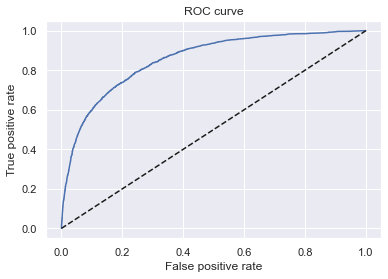

In [162]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [163]:
thresholds

array([1.92146317, 0.92146317, 0.9173403 , ..., 0.005185  , 0.00470589,
       0.00382193])

In [164]:
thresholds.shape

(6725,)

In [165]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
# We concatenate 3 dataframes along the columns.

In [166]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
# We name the columns of the dataframe 'thresholds', 'fpr', and 'tpr'.

In [167]:
df_cutoffs.head()

,thresholds,fpr,tpr
0,1.921463,0.000000,0.000000
1,0.921463,0.000036,0.000000
2,0.917340,0.000071,0.000000
3,0.901345,0.000071,0.002063
4,0.899919,0.000107,0.002063


In [168]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be equal to a number, very close to 1
# but smaller than 1, say 1 - 1 / 10 ^ 16.

In [169]:
df_cutoffs['Score'] = ((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * ((max_score - min_score) / (max_sum_coef - min_sum_coef)) + min_score).round()
# The score corresponsing to each threshold equals:
# The the difference between the natural logarithm of the ratio of the threshold and 1 minus the threshold and
# the minimum sum of coefficients
# multiplied by
# the sum of the minimum score and the ratio of the difference between the maximum score and minimum score and 
# the difference between the maximum sum of coefficients and the minimum sum of coefficients.

In [170]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,1902.0
1,0.921463,0.000036,0.000000,796.0
2,0.917340,0.000071,0.000000,792.0
3,0.901345,0.000071,0.002063,781.0
4,0.899919,0.000107,0.002063,780.0


In [171]:
df_cutoffs['Score'][0] = max_score

In [172]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.921463,0.000036,0.000000,796.0
2,0.917340,0.000071,0.000000,792.0
3,0.901345,0.000071,0.002063,781.0
4,0.899919,0.000107,0.002063,780.0


In [173]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score
6720,0.005426,0.999608,1.0,346.0
6721,0.005380,0.999679,1.0,346.0
6722,0.005185,0.999751,1.0,344.0
6723,0.004706,0.999857,1.0,338.0
6724,0.003822,1.000000,1.0,326.0


In [174]:
# We define a function called 'n_approved' which assigns a value of 1 if a predicted probability
# is greater than the parameter p, which is a threshold, and a value of 0, if it is not.
# Then it sums the column.
# Thus, if given any percentage values, the function will return
# the number of rows wih estimated probabilites greater than the threshold. 
def n_approved(p):
    return np.where(df_actual_predicted_probs['y_hat_test_proba'] >= p, 1, 0).sum()

In [175]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
# Assuming that all credit applications above a given probability of being 'good' will be approved,
# when we apply the 'n_approved' function to a threshold, it will return the number of approved applications.
# Thus, here we calculate the number of approved appliations for al thresholds.
df_cutoffs['N Rejected'] = df_actual_predicted_probs['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
# Then, we calculate the number of rejected applications for each threshold.
# It is the difference between the total number of applications and the approved applications for that threshold.
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / df_actual_predicted_probs['y_hat_test_proba'].shape[0]
# Approval rate equalts the ratio of the approved applications and all applications.
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
# Rejection rate equals one minus approval rate.

In [176]:
df_cutoffs.head()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,30000,0.000000,1.000000
1,0.921463,0.000036,0.000000,796.0,1,29999,0.000033,0.999967
2,0.917340,0.000071,0.000000,792.0,2,29998,0.000067,0.999933
3,0.901345,0.000071,0.002063,781.0,6,29994,0.000200,0.999800
4,0.899919,0.000107,0.002063,780.0,7,29993,0.000233,0.999767


In [177]:
df_cutoffs.tail()

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
6720,0.005426,0.999608,1.0,346.0,29989,11,0.999633,0.000367
6721,0.005380,0.999679,1.0,346.0,29991,9,0.999700,0.000300
6722,0.005185,0.999751,1.0,344.0,29993,7,0.999767,0.000233
6723,0.004706,0.999857,1.0,338.0,29996,4,0.999867,0.000133
6724,0.003822,1.000000,1.0,326.0,30000,0,1.000000,0.000000


In [178]:
df_cutoffs.iloc[5000: 6200, ]
# Here we display the dataframe with cutoffs form line with index 5000 to line with index 6200.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
5000,0.024193,0.478208,0.930376,435.0,15223,14777,0.507433,0.492567
5001,0.024185,0.478386,0.930376,435.0,15228,14772,0.507600,0.492400
5002,0.024168,0.478529,0.930376,435.0,15232,14768,0.507733,0.492267
5003,0.024168,0.478743,0.930376,435.0,15238,14762,0.507933,0.492067
5004,0.024144,0.478814,0.930376,435.0,15240,14760,0.508000,0.492000
5005,0.024141,0.478992,0.930376,435.0,15245,14755,0.508167,0.491833
5006,0.024126,0.479135,0.930892,435.0,15250,14750,0.508333,0.491667
5007,0.024113,0.479206,0.930892,435.0,15252,14748,0.508400,0.491600
5008,0.024101,0.479242,0.930892,435.0,15253,14747,0.508433,0.491567
5009,0.024077,0.479313,0.930892,435.0,15255,14745,0.508500,0.491500


In [179]:
df_cutoffs.iloc[1000: 2000, ]
# Here we display the dataframe with cutoffs form line with index 1000 to line with index 2000.

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1000,0.199072,0.048288,0.449201,570.0,2226,27774,0.074200,0.925800
1001,0.199056,0.048288,0.449716,570.0,2227,27773,0.074233,0.925767
1002,0.198936,0.048323,0.449716,570.0,2228,27772,0.074267,0.925733
1003,0.198835,0.048323,0.450232,570.0,2229,27771,0.074300,0.925700
1004,0.198828,0.048359,0.450232,570.0,2230,27770,0.074333,0.925667
1005,0.198773,0.048359,0.450748,570.0,2231,27769,0.074367,0.925633
1006,0.198231,0.048430,0.450748,570.0,2233,27767,0.074433,0.925567
1007,0.198219,0.048466,0.451264,570.0,2235,27765,0.074500,0.925500
1008,0.198115,0.048501,0.451264,570.0,2236,27764,0.074533,0.925467
1009,0.197734,0.048501,0.452811,570.0,2239,27761,0.074633,0.925367


In [180]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')

In [181]:
df_scorecard.to_csv('df_scorecard.csv')